In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
data = pd.read_csv("housing.csv")

# We are going to predict the value of house

In [4]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
data.dropna(inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [8]:
from sklearn.model_selection import train_test_split
x = data.drop(['median_house_value'], axis= 1 ) #drop the house value column from whole tabel
y = data['median_house_value'] #only show house value

In [9]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [10]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

# we are going to join x training data and y traning data so that we can correlate 

In [11]:
x_train, x_test , y_train , y_test = train_test_split(x, y , test_size= 0.2)

In [12]:
train_data = x_train.join(y_train)

In [13]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
8376,-118.34,33.95,25.0,3762.0,1281.0,4015.0,1178.0,2.1587,<1H OCEAN,143800.0
12990,-121.24,38.70,13.0,3243.0,488.0,1585.0,480.0,5.7133,INLAND,166800.0
10218,-117.88,33.89,18.0,1616.0,532.0,866.0,496.0,3.6435,<1H OCEAN,119100.0
15771,-122.44,37.77,52.0,3225.0,667.0,1494.0,619.0,4.4875,NEAR BAY,500001.0
7286,-118.24,33.98,45.0,173.0,42.0,230.0,57.0,3.0724,<1H OCEAN,110700.0
...,...,...,...,...,...,...,...,...,...,...
17597,-121.89,37.30,47.0,1604.0,284.0,639.0,278.0,5.8415,<1H OCEAN,283300.0
18323,-122.13,37.44,43.0,3004.0,440.0,1088.0,427.0,9.1508,NEAR BAY,500001.0
8782,-118.32,33.80,29.0,4317.0,1037.0,2102.0,959.0,3.1275,<1H OCEAN,286400.0
4500,-118.21,34.05,28.0,950.0,357.0,1485.0,345.0,1.9271,<1H OCEAN,136400.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

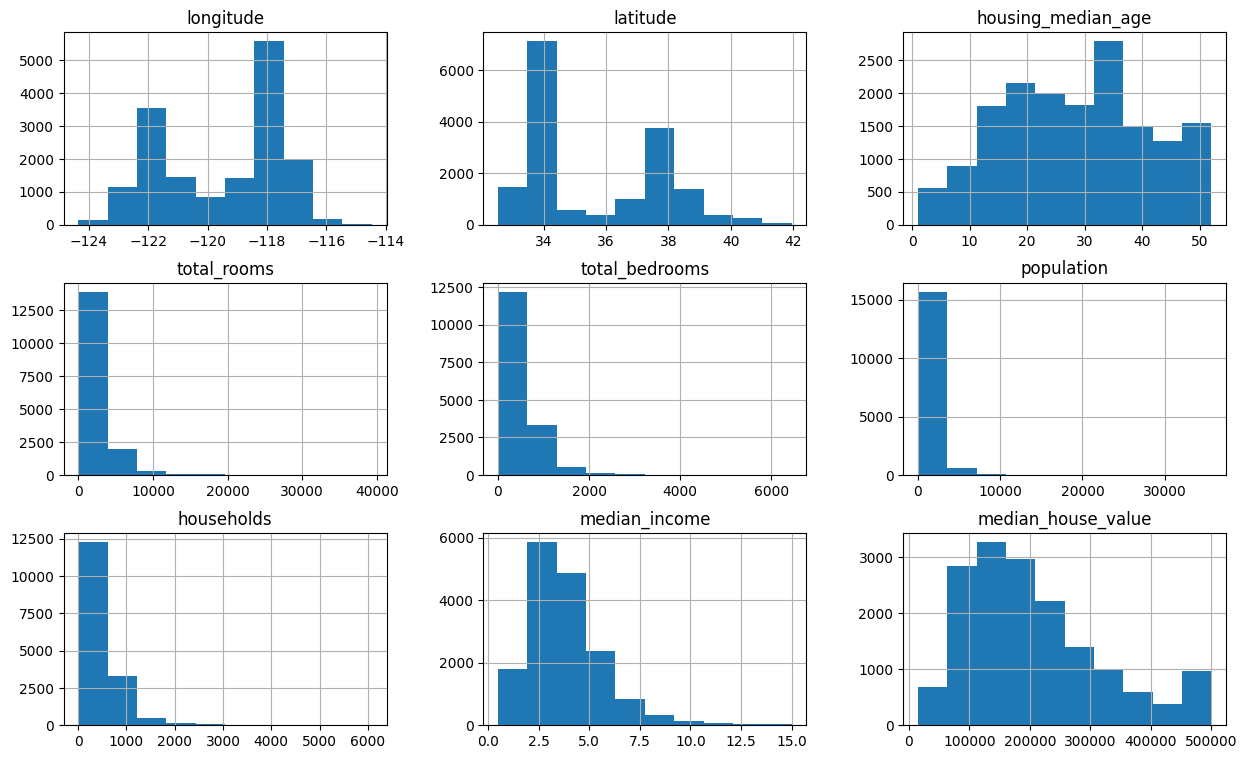

In [14]:
#lets make histogram 
train_data.hist(figsize =(15,9))

In [15]:
categorical_columns = train_data.select_dtypes(include=['object']).columns
print(f"Categorical columns: {categorical_columns}")

Categorical columns: Index(['ocean_proximity'], dtype='object')


In [16]:
train_data_encoded = pd.get_dummies(train_data, columns=categorical_columns)

In [17]:
#correation map
correlation_matrix = train_data_encoded.corr()

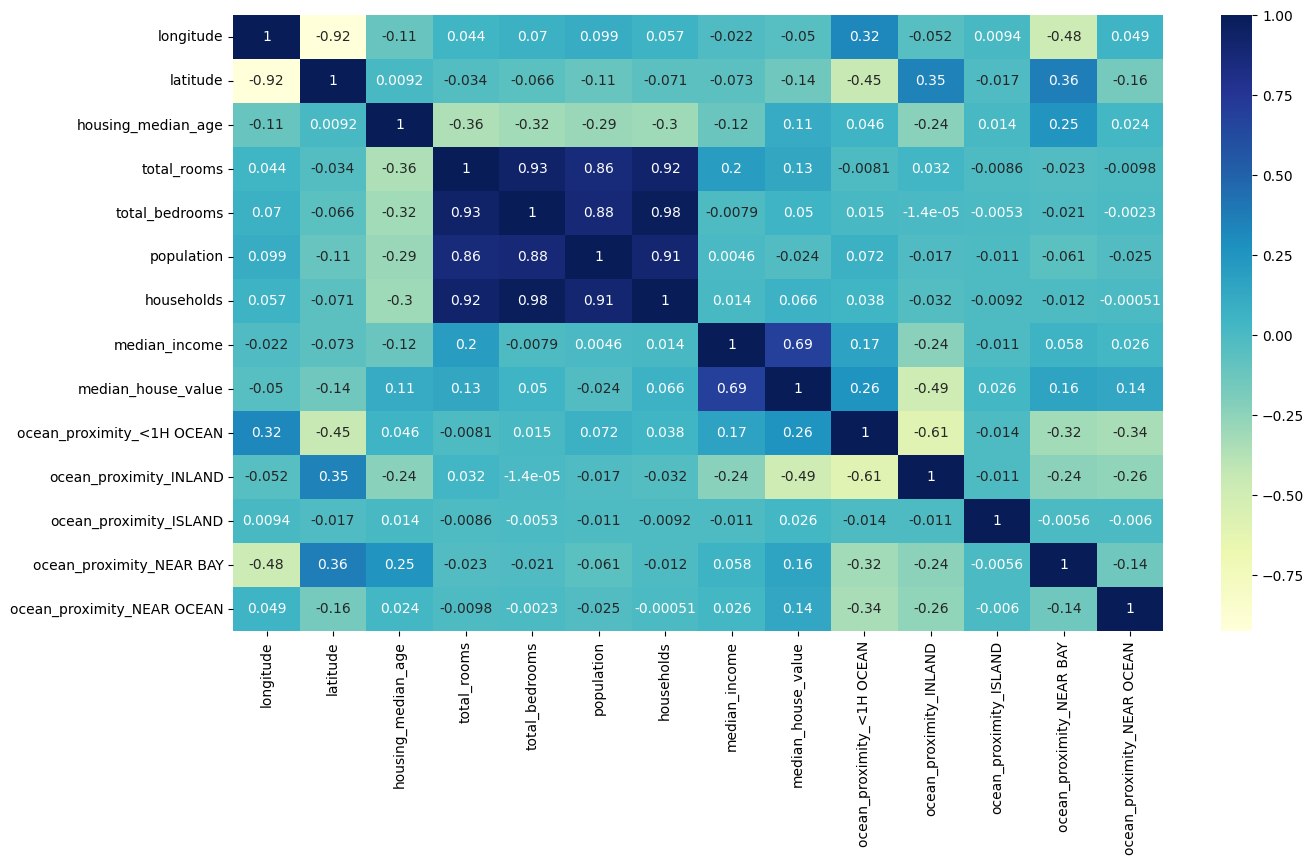

In [18]:
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.show()

# now we are going to make histogram gaussian bell curve for futer prediction by using log algorightm 
## Data Prepocessing

In [19]:
train_data['total_rooms']= np.log(train_data['total_rooms'] +1) #in order to prevent the 0 values 
train_data['total_bedrooms']= np.log(train_data['total_bedrooms'] +1)
train_data['population']= np.log(train_data['population'] +1)
train_data['households']= np.log(train_data['households'] +1)

# now we can see that it is bell curve gaussian curve
### Transforming the data to be more Gaussian using techniques like log transformations can lead to better model performance, more reliable statistical tests, easier interpretation of results, and a more stable variance. It is a common preprocessing step to ensure that the data meets the assumptions of many machine learning algorithms.

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

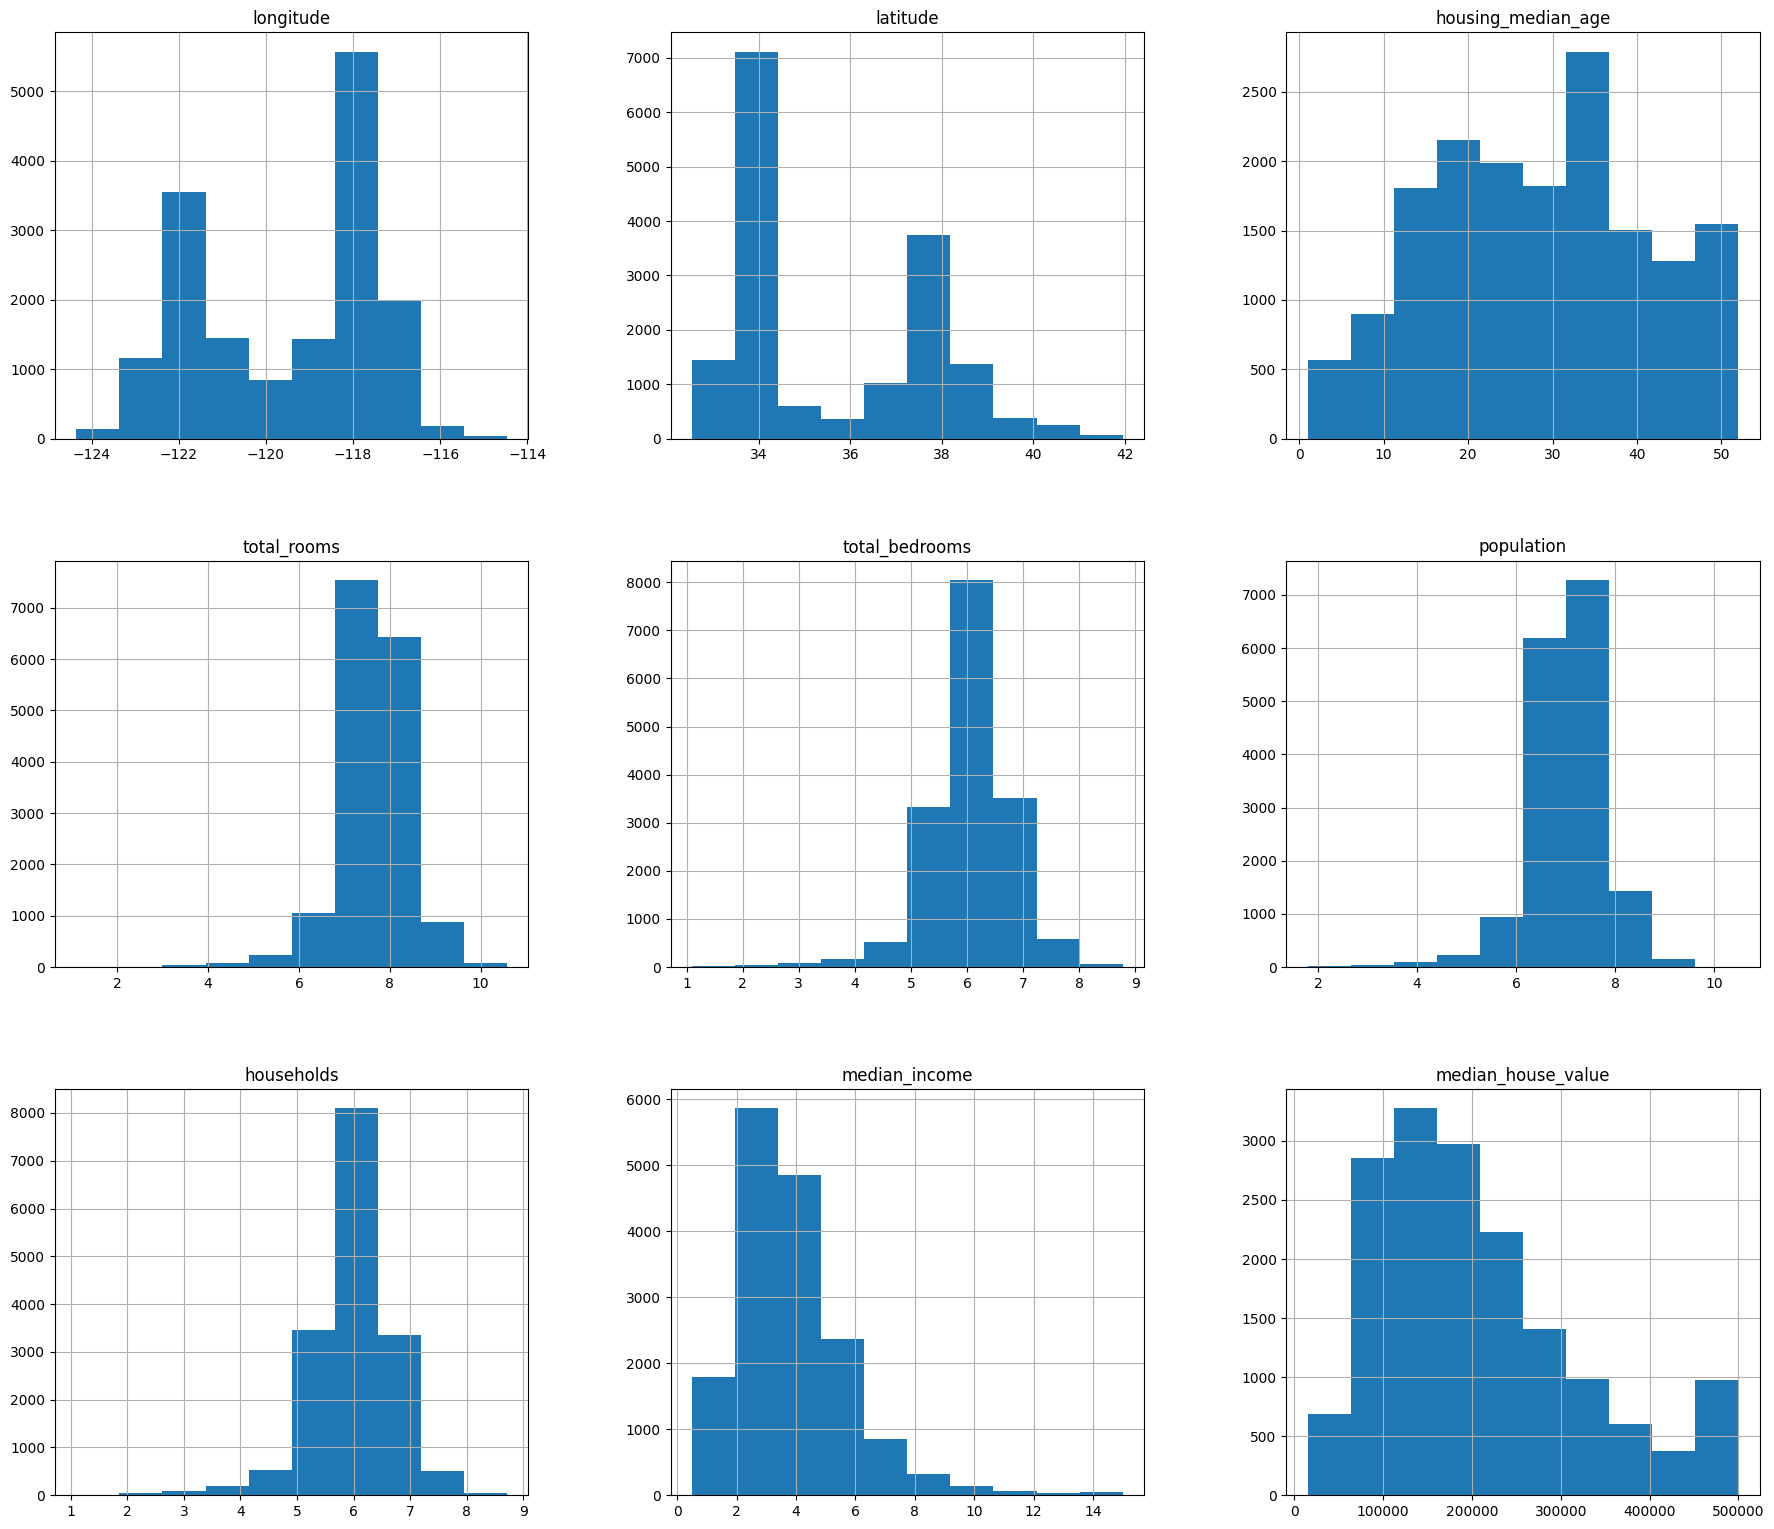

In [20]:
train_data.hist(figsize = (22 , 19)) 

# I think we should take ocean_proximity into anayalsis because when ocean is near there is high house price and when it is not then low price 

## We are going to give num to ocean proximity not 1 , 2 .. but binary numbers 

In [22]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7273
INLAND        5130
NEAR OCEAN    2100
NEAR BAY      1839
ISLAND           4
Name: count, dtype: int64

# we are going to give 0 , 1  in yes or no for example if <1H OCEAN     7226 if yes than 1 and no than 0 

In [23]:
## i created the dummies but it was showing in true false so i used int 

In [24]:
dummies = pd.get_dummies(train_data.ocean_proximity)
dummies = dummies.astype(int)

In [25]:
#concanicate the dubbies in orginanal data that is train _data
train_data = pd.concat([train_data, dummies], axis=1)
# Drop the original 'ocean_proximity' column if you don't need it anymore
train_data = train_data.drop('ocean_proximity', axis=1)

In [26]:
print(train_data.head())

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
8376     -118.34     33.95                25.0     8.232972        7.156177   
12990    -121.24     38.70                13.0     8.084562        6.192362   
10218    -117.88     33.89                18.0     7.388328        6.278521   
15771    -122.44     37.77                52.0     8.078998        6.504288   
7286     -118.24     33.98                45.0     5.159055        3.761200   

       population  households  median_income  median_house_value  <1H OCEAN  \
8376     8.298042    7.072422         2.1587            143800.0          1   
12990    7.368970    6.175867         5.7133            166800.0          0   
10218    6.765039    6.208590         3.6435            119100.0          1   
15771    7.309881    6.429719         4.4875            500001.0          0   
7286     5.442418    4.060443         3.0724            110700.0          1   

       INLAND  ISLAND  NEAR BAY  NEAR OCEAN  
8376

<Axes: >

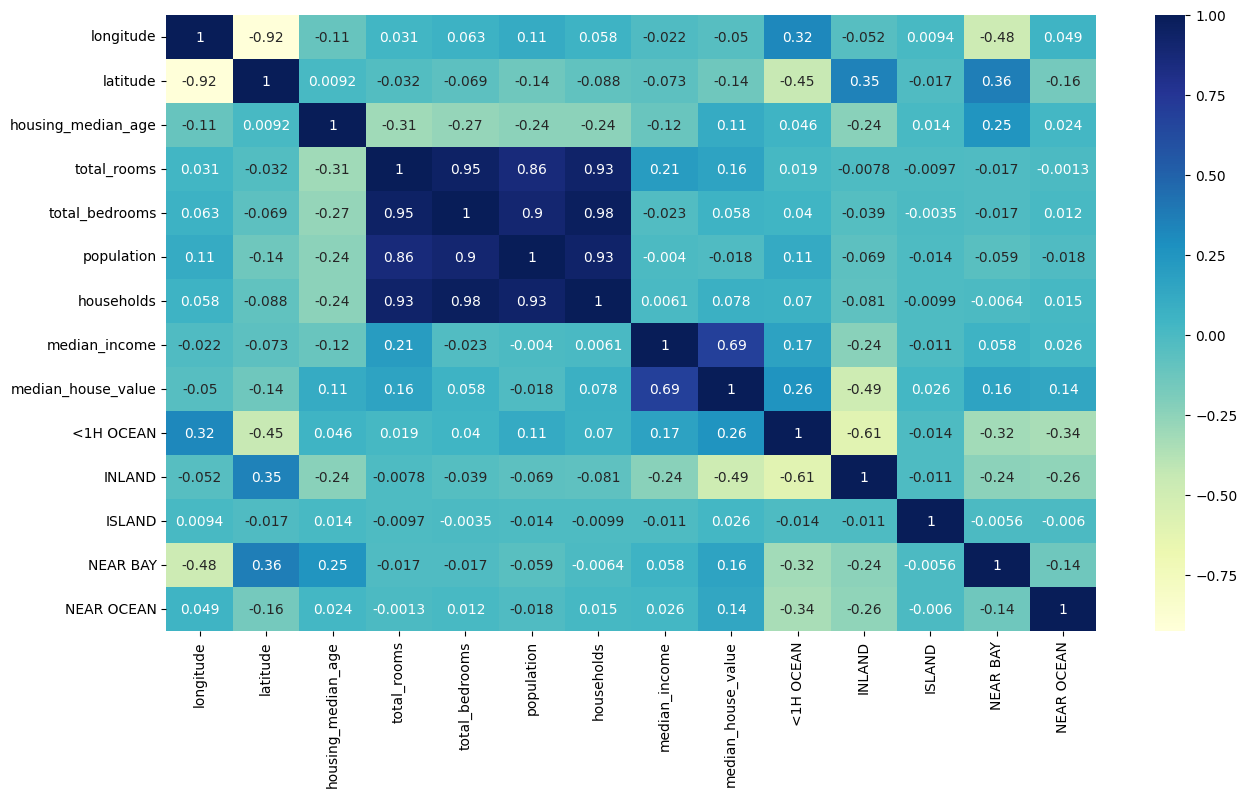

In [27]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr() , annot = True , cmap = 'YlGnBu')

# How this new feactures correlated with each other ?
## 1) if you check the median house value as a negative correlation with islands . so u are in island you pay less amount for house .
## 2) and for the 1H Ocean is opp like it is more positive it shows thatit has high amount of price 

# Now we are going to make new features and join them with this to futer anliysis 

### basically hue is in sns library that shows you the catagorial value like median house value i did it in categorial form so it has o be in hue 

<Axes: xlabel='latitude', ylabel='longitude'>

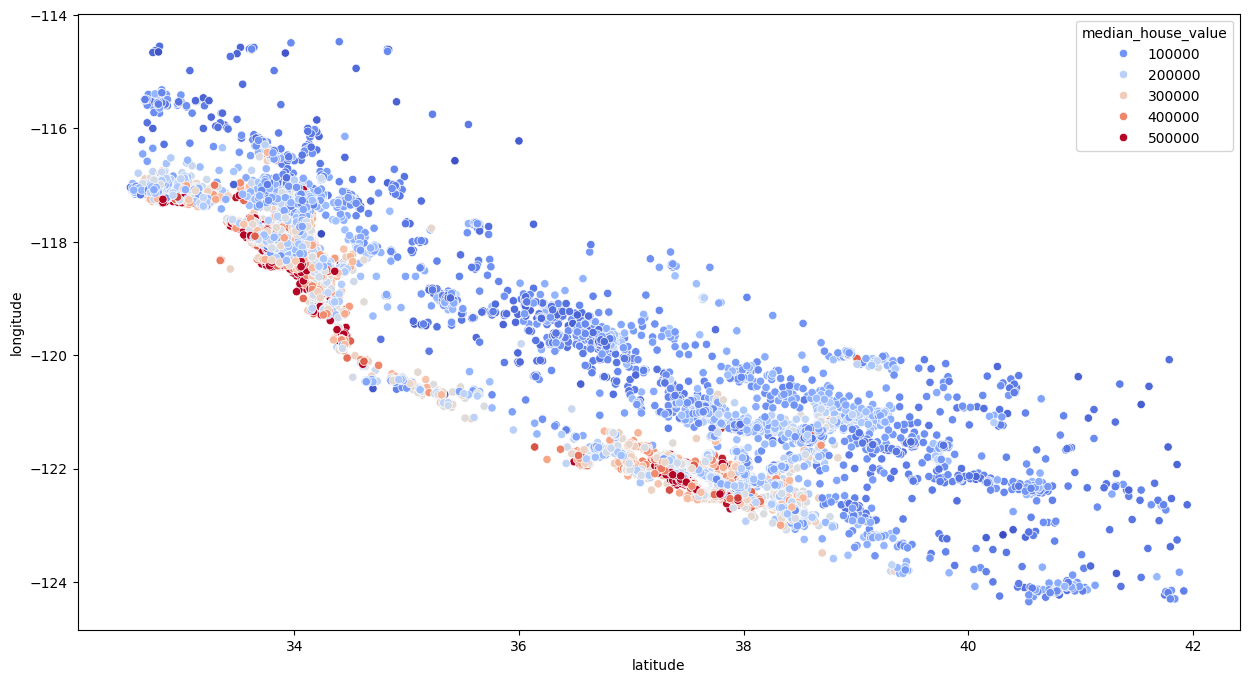

In [28]:
plt.figure(figsize =(15,8))
sns.scatterplot(x='latitude' , y='longitude' , data= train_data , hue = 'median_house_value' , palette = "coolwarm")

## In this above graph we can see that more darker it gets more costly the house is 

# feature enginering 

## we have to combine the features to make the visulaize more accuraete 
## for example we have total_rooms  and also bedrooms so intersting will be that how many bedroom do room as how many of rooms will be bedrooms  

In [29]:
train_data ['bedroom_ration']= train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms']/train_data['households']

<Axes: >

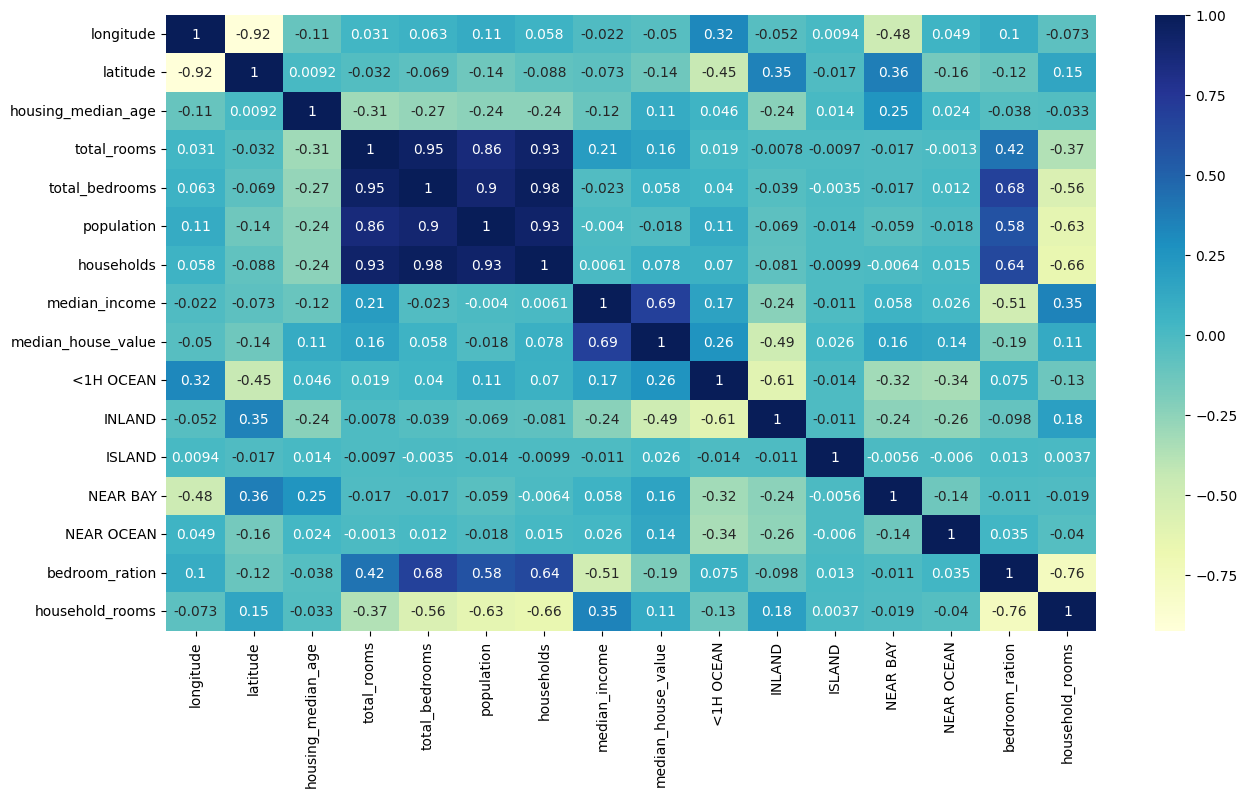

In [30]:
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr() ,annot = True , cmap = 'YlGnBu')

### 1)Here we can see that the bedroom ration is negative to house value means lower the price so it is not interseting  but if you check the households it has higher price value it hass interseting
### 2) Relationships:
### Median House Value and Bedroom Ratio:

### Correlation Value: -0.12
### Interpretation: There is a weak negative correlation between median house value and bedroom ratio. This suggests that as the bedroom ratio increases, the median house value tends to decrease slightly, but the relationship is not strong.
### Median House Value and Household Rooms:

### Correlation Value: 0.13
### Interpretation: There is a weak positive correlation between median house value and household rooms. This indicates that as the number of household rooms increases, the median house value tends to increase slightly, but again, the relationship is not strong.

# We are going to train a model but simple model os LINEAR REGRESSION MODEL 

In [31]:
from sklearn.linear_model import LinearRegression
x_train , y_train = train_data.drop(['median_house_value'] , axis = 1), train_data['median_house_value']


reg = LinearRegression()
reg.fit(x_train , y_train)

LinearRegression()

# now we are goin to to scale the data we didn't scale the data so i is not giving the whole picture  we are not gong to do hyperparameter for random froset we are doing hyerparameter 

In [33]:
test_data = x_test.join(y_test)

test_data['total_rooms']= np.log(test_data['total_rooms'] +1) #in order to prevent the 0 values 
test_data['total_bedrooms']= np.log(test_data['total_bedrooms'] +1)
test_data['population']= np.log(test_data['population'] +1)
test_data['households']= np.log(test_data['households'] +1)

dummies = pd.get_dummies(test_data.ocean_proximity)
dummies = dummies.astype(int)
test_data = pd.concat([test_data, dummies], axis=1)
test_data = test_data.drop('ocean_proximity', axis=1)

test_data ['bedroom_ration']= test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/test_data['households']

In [35]:
x_test , y_test = test_data.drop(['median_house_value'] , axis = 1), test_data['median_house_value']

In [36]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ration,household_rooms
13557,-117.32,34.10,27.0,7.627544,6.135565,7.460490,6.139885,3.1213,78800.0,0,1,0,0,0,0.804396,1.242294
7184,-118.17,34.04,44.0,6.539586,5.049856,6.419995,4.962845,1.9667,133900.0,1,0,0,0,0,0.772198,1.317709
5010,-118.32,34.01,44.0,8.302266,6.817831,7.392032,6.744059,2.4934,165800.0,1,0,0,0,0,0.821201,1.231049
18172,-122.02,37.36,24.0,7.444249,6.082219,6.794587,6.013715,4.9671,335200.0,1,0,0,0,0,0.817036,1.237878
13186,-117.69,34.09,28.0,7.271009,5.690359,6.586172,5.572154,2.7250,140200.0,0,1,0,0,0,0.782609,1.304883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14062,-117.12,32.74,52.0,7.585789,5.966147,6.777647,6.052089,3.7900,163400.0,0,0,0,0,1,0.786490,1.253417
19676,-121.63,39.16,7.0,7.539027,6.098074,6.971669,6.018593,2.4183,103800.0,0,1,0,0,0,0.808868,1.252623
13780,-117.05,34.01,27.0,8.609772,7.095064,7.880804,7.031741,2.1927,116700.0,0,1,0,0,0,0.824071,1.224415
13926,-114.65,34.89,17.0,7.846590,6.376727,6.913737,5.996452,1.6991,69100.0,0,1,0,0,0,0.812675,1.308539


In [38]:
reg.score(x_test,y_test)

0.6700244976148382

In [39]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train , y_train)

RandomForestRegressor()

In [40]:
forest.score(x_test,y_test)

0.8138002299470195

In [ ]:
# We can get high acurray by more than 81 